# Notes - Xarray plotting

- Xarray plotting, https://docs.xarray.dev/en/stable/user-guide/plotting.html
- CLEX CMS Blog, https://climate-cms.org/posts/2018-09-28-line-plots-with-xarray.html

In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Open data

In [26]:
#--- open data
datapath = "../data/"
filename = "data-am4_20010725_8xdaily-temp.nc"

files_input = datapath+"/"+filename

#--- use xarray to open the files
data = xr.open_dataset(files_input)
temp = data.temp
temp

<xarray.DataArray 'temp' (time: 8, pfull: 33, lat: 180, lon: 288)>
[13685760 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 2001-07-25 01:30:00 ... 2001-07-25 22:30:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

## XY plots

## Draw one line

- determine X and Y axis
  - y="pfull", dimension "pfull" would be drew on Y-axis.
- control axes direction
  - xincrease=False, yincrease-False
  
In addition, one can use xscale, yscale to set axes scaling; xticks, yticks to set axes ticks and xlim, ylim to set axes limits. These accept the same values as the matplotlib methods Axes.set_(x,y)scale(), Axes.set_(x,y)ticks(), Axes.set_(x,y)lim() respectively.
  

<xarray.DataArray 'temp' (pfull: 33)>
array([230.04013, 221.64867, 212.65216, 203.52283, 199.12143, 197.18576,
       196.692  , 197.12149, 198.02446, 198.9028 , 200.37065, 200.87456,
       204.6634 , 214.22688, 221.01515, 230.9946 , 239.03181, 246.67455,
       250.95023, 253.35724, 254.87914, 255.80421, 257.0818 , 259.1446 ,
       261.1658 , 262.73758, 264.12997, 265.27338, 266.25244, 267.10114,
       267.7813 , 268.31064, 268.74295], dtype=float32)
Coordinates:
    lat      float64 -59.5
    lon      float64 63.13
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
    time     object 2001-07-25 01:30:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2


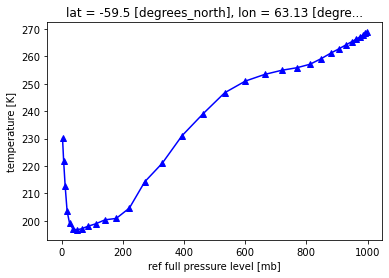

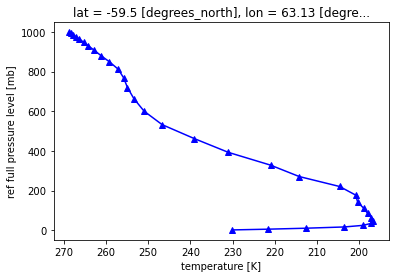

In [94]:
#temp1D = temp.sel(time=1, lat=10, lon=10, method='nearest')
temp1D_t = temp[:,29,10,20]
temp1D_p = temp[0,:,30,50]
print(temp1D_p)

#temp1D_p.plot()  # default plotting
temp1D_p.plot.line("b-^")
plt.show()

temp1D_p.plot.line("b-^", xincrease=False, y="pfull")
plt.show()

## Draw multiple lines
https://docs.xarray.dev/en/stable/user-guide/plotting.html#multiple-lines-showing-variation-along-a-dimension

It is required to explicitly specify either
1. x: the dimension to be used for the x-axis, or
2. hue: the dimension you want to represent by multiple lines.

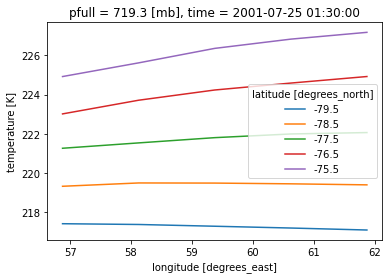

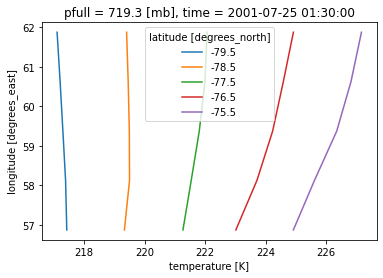

In [95]:
#--- draw multiple lines
temp_2D_pj = temp[0,20,10:15,45:50]
#print(temp_2D_pj)  # (lat, lon)

temp_2D_pj.plot.line(x="lon")              # x-axis: lon, y-axis: variable (default), lines: different lats
plt.show()

temp_2D_pj.plot.line(y="lon", hue="lat")  # x-axis: variable, y-axis: lon, lines: different lats
plt.show()

## Controlling the figure size

figsize = (aspect * size, size). You can think about "size" is Y axis, and aspect is the X axis propotional to the Y Axis

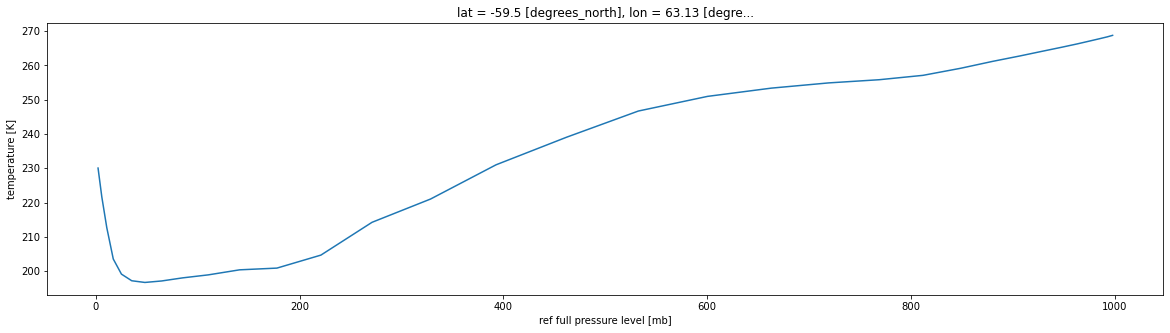

In [96]:
temp1D_p.plot(aspect=4, size=5)
#plt.tight_layout()

## Panel plots